# COCO dataset

Coco 数据集（Common Objects in Context，COCO）是一个广泛应用于计算机视觉领域的公开数据集，由微软（Microsoft）于2014年推出。它主要用于图像识别、物体检测、分割和关键点检测等任务。COCO 数据集因其高质量、多样化和规模化的数据标注，成为了许多深度学习模型的评测标准。本文将介绍 COCO 数据集的背景、数据内容、标注类型以及如何使用 COCO 数据集进行计算机视觉研究。

## COCO 数据集的背景

在计算机视觉研究中，数据质量和标注的细致程度至关重要。传统数据集往往只包含单一的标注类型，例如图像分类标签或简单的边界框，难以在复杂的视觉场景中准确评估算法表现。为解决这一问题，COCO 数据集采用了更丰富的标注方式，支持检测、分割等复杂的任务。同时，COCO 数据集的图片来源于真实场景，包含了大量常见的日常物品和自然背景，这使得模型能够在更真实的场景中进行测试。

## 数据集内容概览

COCO 数据集包含了 20 多万个图像，覆盖了 80 类常见物体，如人、汽车、动物、家用电器等。在这些图像中，共标注了约 150 万个对象实例，确保了足够的多样性和数据量。数据集中图片分辨率较高，拍摄角度多样，背景复杂，这为模型提供了更为广泛的训练数据，提升模型在实际应用中的表现。

##  标注类型

COCO 数据集的丰富性不仅体现在类别和数量上，还体现在标注的多样性。COCO 数据集的标注类型主要包括以下几种：

* 图像分类：每张图像都被标注了物体的类别标签。
* 物体检测：每个物体都使用矩形边界框（Bounding Box）进行标注，帮助模型学习物体的位置。
* 分割（语义和实例分割）：分割标注提供了每个对象的像素级轮廓信息，分为语义分割（所有同类对象共享一个标签）和实例分割（每个对象实例都有独立的标注）。
* 关键点检测：COCO 数据集还包括人体关键点标注，用于检测人体的关节位置（例如肩膀、肘部、膝盖等），适合于姿态估计任务。

这些标注类型适用于多种计算机视觉任务，为研究者提供了丰富的实验基础。

### images

* `id`：图像的唯一 ID。
* `width`：图像的宽度（像素）。
* `height`：图像的高度（像素）。
* `file_name`：图像文件的名称。
* `license`：图像的许可证 ID。
* `flickr_url` 和 `coco_url`：图像在 Flickr 和 COCO 数据库中的 URL 地址。
* `date_captured`：图像的拍摄日期。

### annotations

* `id`：标注的唯一 ID。
* `image_id`：标注所属的图像 ID，对应 images 中的 id 字段。
* `category_id`：标注对象的类别 ID，对应 categories 中的 id 字段。
* `bbox`：边界框坐标，格式为 `[x_min, y_min, width, height]`，描述对象在图像中的位置。
* `area`：标注区域的面积（以像素为单位）。
* `segmentation`：用于语义分割的对象轮廓信息，以多边形形式表示。格式可以是单一多边形 `[x1, y1, x2, y2, ...]`，或多重多边形 `[[x1, y1, x2, y2, ...], ...]`。
* `iscrowd`: 标识对象是否为“群体”对象（例如人群、羊群等），1 表示群体对象，0 表示单个对象。

### categories

* `id`：类别的唯一 ID，用于关联 annotations 中的 category_id。
* `name`：类别名称（如 "person", "car"）。
* `supercategory`：类别的上级类别（如 "vehicle" 是 "car" 的 supercategory）。

In [13]:
annotations = {
    "info": {...},
    "images": [
        {
            "license": 4,
            "file_name": "000000397133.jpg",
            "coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
            "height": 427,
            "width": 640,
            "date_captured": "2013-11-14 17:02:52",
            "flickr_url": "http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg",
            "id": 397133,
        },
        ...,
    ],
    "annotations": [
        {
            "id": 1,
            "image_id": 1,
            "category_id": 18,
            "bbox": [100.42, 200.25, 50.75, 100.33],
            "area": 5098.66,
            "segmentation": [[100.42, 200.25, ...]],
            "iscrowd": 0,
        },
        ...,
    ],
    "categories": [{"id": 1, "name": "person", "supercategory": "person"}, ...],
}

## 使用 COCO 数据集

COCO 数据集的下载和使用相对简单，官方提供了数据下载链接和 API 接口。COCO API 是一个用来加载和处理 COCO 数据集的 Python 库，提供了读取、显示和操作数据的工具。以下是 COCO 数据集的一些常用操作：

1. 加载数据：使用 COCO API，可以快速加载数据，并按类别、标注类型等进行筛选。
2. 可视化：COCO API 提供了简单的可视化工具，可以直观展示图像及其标注。
3. 评估模型：COCO 数据集的评估指标（如 mAP, mean Average Precision）是衡量模型性能的重要工具。

loading annotations into memory...
Done (t=16.07s)
creating index...
index created!


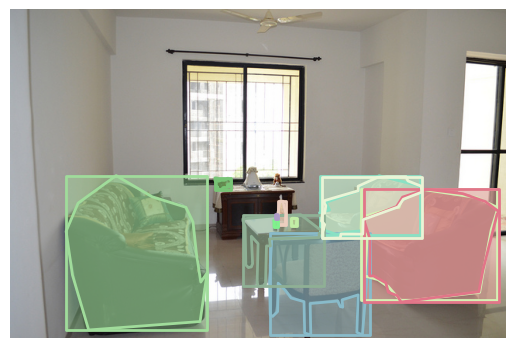

In [11]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from PIL import Image
import requests

# 加载 COCO 数据集
coco = COCO("/data/datasets/coco/annotations/instances_train2017.json")
image_id = coco.getImgIds(catIds=[18])[0]  # 假设类别为 18
image = coco.loadImgs(image_id)[0]

# 加载并显示图像
img = Image.open(requests.get(image["coco_url"], stream=True).raw)
plt.imshow(img)
plt.axis("off")

# 获取物体的边界框和分割
ann_ids = coco.getAnnIds(imgIds=image["id"], iscrowd=None)
annotations = coco.loadAnns(ann_ids)
coco.showAnns(annotations, draw_bbox=True)

plt.show()

## COCO 数据集的应用场景

COCO 数据集广泛应用于以下任务：

* 物体检测：通过边界框标注数据训练模型，实现对图像中物体的检测与分类。
* 图像分割：利用语义和实例分割标注，模型能够精确区分每个对象的像素区域。
* 人体姿态估计：关键点标注帮助模型学习人体姿态识别的能力。
* 多任务学习：结合多个标注类型，训练一个能够同时进行检测、分割和姿态估计的多任务模型。